# Efficient Patch Generation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anima
import librosa

Generate fixed-duration excerpts of a signal using `librosa.util.frame`

In [6]:
y, sr = librosa.load(librosa.ex('libri1'))

melspec = librosa.power_to_db(librosa.feature.melspectrogram(y = y, sr = sr), ref = np.max)

print(f'Shape of Mel spectrogram: {melspec.shape}')

Shape of Mel spectrogram: (128, 640)


[Text(0.5, 1.0, 'Full Mel spectrogram')]

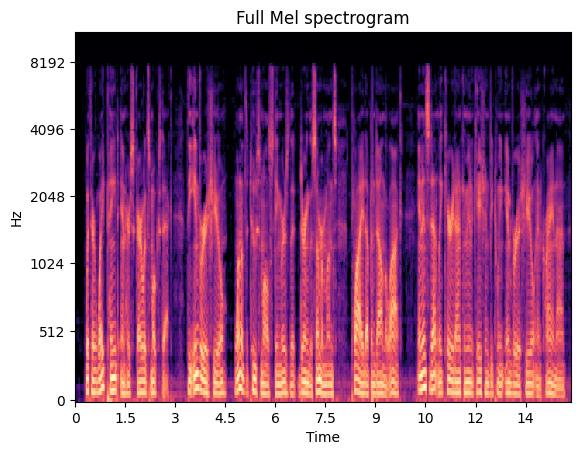

In [7]:
fig, ax = plt.subplots()
librosa.display.specshow(melspec, x_axis = 'time', y_axis = 'mel', ax = ax)
ax.set(title = 'Full Mel spectrogram')

In [8]:
frame_length = librosa.time_to_frames(5.0) # 5 second patches
hop_length = librosa.time_to_frames(0.10) # 0.1 second separation b/w patches
print(f'Frame length = {frame_length}, Hop length = {hop_length}')

Frame length = 215, hop_length = 4


In [11]:
patches = librosa.util.frame(melspec, frame_length = frame_length, hop_length = hop_length)

# resulting patches array is now three-dimensional, with axes corresponding to [frequency, time, patch index]

print(f'Shape of patch array: {patches.shape}')

Shape of patch array: (128, 215, 107)


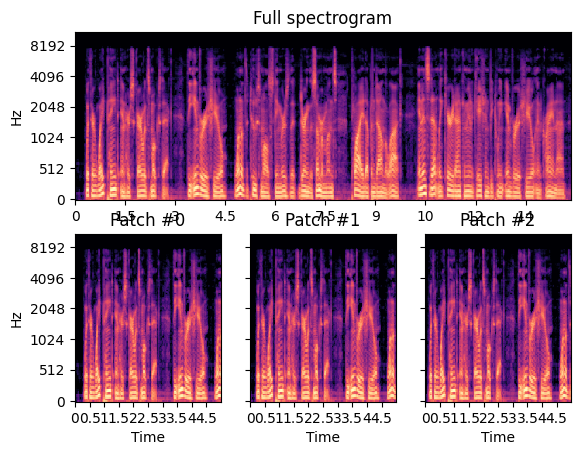

In [12]:
fig, ax = plt.subplot_mosaic([list('AAA'), list('012')])

librosa.display.specshow(melspec, x_axis = 'time', y_axis = 'mel', ax = ax['A'])
ax['A'].set(title = 'Full spectrogram', xlabel = None)

for index in [0, 1, 2]:
    librosa.display.specshow(patches[..., index],
                             x_axis = 'time', y_axis = 'mel',
                             ax = ax[str(index)])
    ax[str(index)].set(title = f'Patch #{index}')
    ax[str(index)].label_outer()

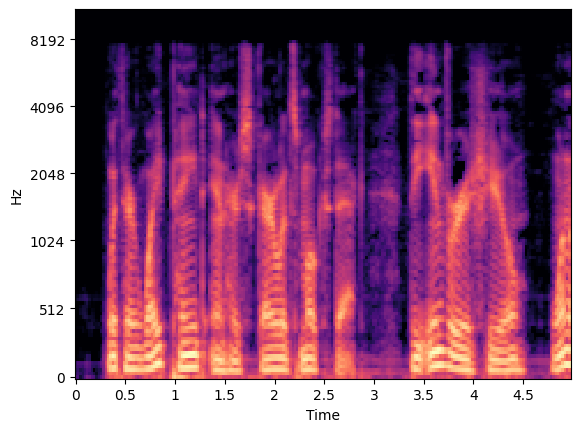

In [14]:
fig, ax = plt.subplots()
mesh = librosa.display.specshow(patches[..., 0], x_axis = 'time',
                                y_axis = 'mel',ax = ax)

def _update(n):
    mesh.set_array(patches[..., n])
    return (mesh, )

ani = anima.FuncAnimation(fig, func  = _update, frames = patches.shape[-1], interval = 100, blit = True)

![Screenshot from 2024-05-22 11-21-29.png](<attachment:Screenshot from 2024-05-22 11-21-29.png>)
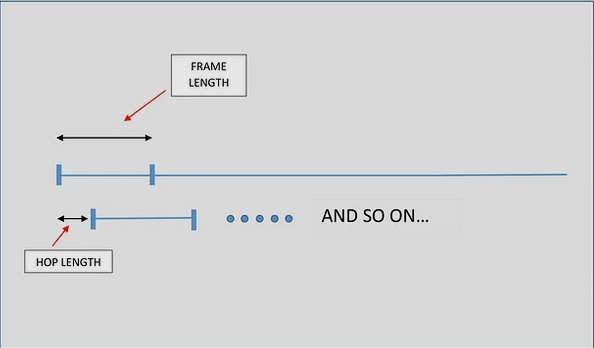